# EDA Titanic

Este cuaderno reproduce paso a paso el Análisis Exploratorio de Datos (EDA) del dataset **Titanic**, siguiendo la misma estructura que los apuntes.

📂 **Requisito previo**: asegúrate de tener el archivo `titanic.csv` en el mismo directorio del notebook o súbelo en Colab.

## 0. Importación de librerías y carga del dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv("titanic_sucio.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Conocer el dataset

En esta sección revisamos la estructura del dataset:

- Columnas disponibles
- Tipos de datos
- Primeras filas
- Valores nulos y duplicados

In [89]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1324 non-null   int64  
 1   Survived     1324 non-null   int64  
 2   Pclass       1324 non-null   int64  
 3   Name         1324 non-null   object 
 4   Sex          1324 non-null   object 
 5   Age          1025 non-null   float64
 6   SibSp        1324 non-null   int64  
 7   Parch        1324 non-null   int64  
 8   Ticket       1324 non-null   object 
 9   Fare         1282 non-null   float64
 10  Cabin        300 non-null    object 
 11  Embarked     1322 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 124.3+ KB


In [90]:
# Resumen estadístico de las variables numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1324.000000,1324.000000,1324.000000,1025.000000,1324.000000,1324.000000,1282.000000
mean,652.825529,0.376133,2.294562,30.809922,0.496979,0.385952,33.059990
std,378.402912,0.484597,0.838023,21.285027,1.037829,0.865820,53.664291
min,1.000000,0.000000,1.000000,-15.000000,0.000000,0.000000,-80.000000
25%,325.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,651.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,980.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1309.000000,1.000000,3.000000,250.000000,8.000000,9.000000,512.329200


**Conclusiones iniciales:**

- Vemos cuántas filas y columnas tiene el dataset.
- Identificamos columnas numéricas y categóricas.

In [91]:
# Valores nulos por columna
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,299
SibSp,0
Parch,0
Ticket,0
Fare,42


In [92]:
# Filas duplicadas
df.duplicated().sum()

np.int64(15)

**Conclusiones sobre nulos y duplicados:**

- `Age`, `Cabin`, `Fare` y `Embarked` tienen valores nulos que será necesario tratar en preprocesamiento.
- `Cabin` tiene tantos valores nulos que no va a ser una columna útil.
- No hay filas duplicadas de las que debamos ocuparnos más tarde.

### Valores únicos en variables categóricas

In [93]:
# Categorías en 'Embarked'
df["Embarked"].unique()

array(['S', 'C', 'Q', 'southampton', nan, 'C ', ' S '], dtype=object)

In [94]:
# Sexo
df["Sex"].unique()

array(['male', 'female', 'Male', 'FEMALE', ' male '], dtype=object)

In [95]:
# Clase del pasajero
df["Pclass"].unique()

array([3, 1, 2])

In [96]:
# Cabina
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [97]:
# Ticket
df["Ticket"].unique()[:10]  # mostramos solo los 10 primeros para no saturar la salida

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

In [98]:
# Nombre
df["Name"].unique()[:10]  # mostramos solo los 10 primeros para no saturar la salida

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

**Conclusión:**  
Vemos qué categorías existen y si hay valores nulos o extraños. Esto nos ayuda a detectar posibles errores o categorías poco frecuentes.

En general, todas las categorías tienen valores reducidos.

El `Name`, `Cabin` y `Ticket` son variables textuales (muchos valores diferentes) y no parece que vayan a aportar mucho al modelo. Tu nombre no define tu supervivencia ni el número de Ticket.

## 2. Análisis univariante

En el análisis univariante estudiamos una variable a la vez para entender su distribución y posibles problemas.

### 2.1 Variables numéricas — `Age`

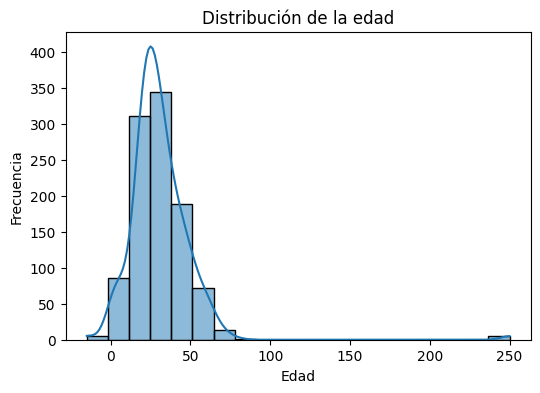

In [99]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"].dropna(), bins=20, kde=True)

plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.show()

**Conclusiones:**

- La mayoría de pasajeros tienen entre ~20 y 40 años.
- Hay menos pasajeros en edades muy altas.
- La presencia de huecos y la cola hacia la derecha indica cierta asimetría.
- Hay outliers erroneos: edad de 250

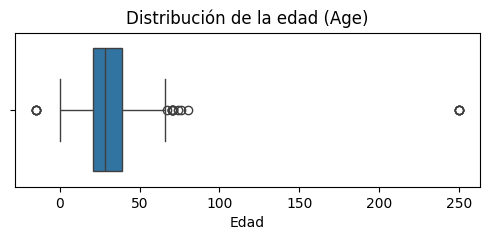

In [100]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Age"])
plt.title("Distribución de la edad (Age)")
plt.xlabel("Edad")
plt.show()

**Conclusiones:**

* La mayoría de pasajeros tienen entre 20 y 40 años.
* Algunos valores altos (personas mayores) aparecen como outliers.
* Hay un outlier incorrecto: edad de 250 años.

### 2.2 Variables numéricas — `Fare`

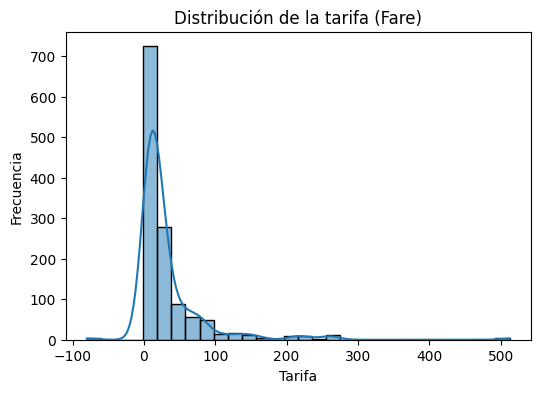

In [101]:
plt.figure(figsize=(6,4))
sns.histplot(df["Fare"].dropna(), bins=30, kde=True)
plt.title("Distribución de la tarifa (Fare)")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.show()

**Conclusiones:**

* La mayoría de tarifas están concentradas en valores bajos.
* Hay una cola larga hacia la derecha (sesgo positivo).
* Existen tarifas muy altas (posibles outliers).
* Existe una tarifa irreal (valor negativo)

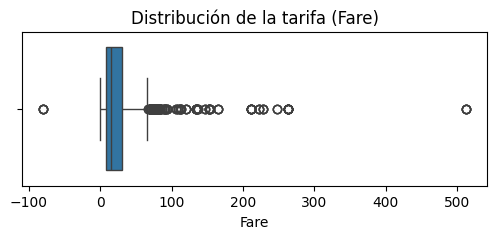

In [102]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df["Fare"])
plt.title("Distribución de la tarifa (Fare)")
plt.xlabel("Fare")
plt.show()

**Conclusiones:**

- La mayoría de tarifas se concentran en valores bajos.
- Existen valores muy altos (puntos alejados) que podrían ser *outliers*.
- Para decidir cómo tratarlos, habrá que analizar el contexto y abordarlo en preprocesamiento.
- En Titanic había diferentes clases (Pclass). Hubo gente que pagó mucho para subir, son valores reales.
- El valor negativo hay que corregirlo.

### 2.3 Variables categóricas — Countplot de `Sex`

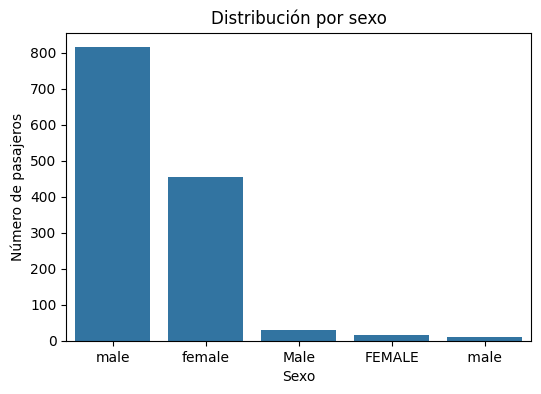

In [103]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", data=df)
plt.title("Distribución por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusiones:**

- Hay más pasajeros hombres que mujeres.
- Esta diferencia puede influir en la supervivencia y se analizará en el análisis bivariante.

### 2.4 Variables categóricas — Countplot de `Survived`

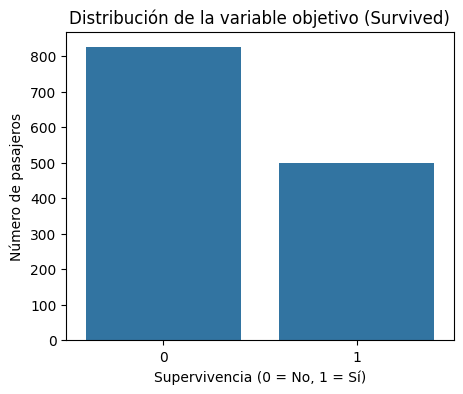

In [104]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survived", data=df)
plt.title("Distribución de la variable objetivo (Survived)")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**
* La clase Survived = 0 (no sobrevivió) es más frecuente.
* El dataset está algo desbalanceado, lo que puede influir en el entrenamiento del modelo.

### 2.5 Variables categóricas — Countplot de `Pclass`

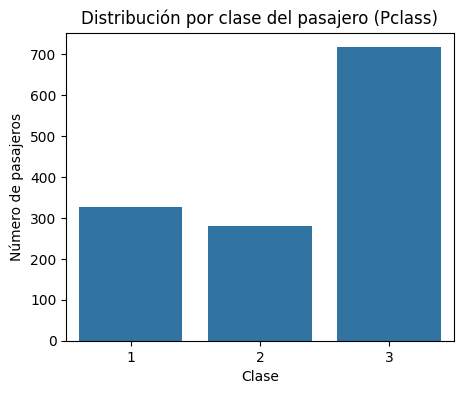

In [105]:
plt.figure(figsize=(5,4))
sns.countplot(x="Pclass", data=df)
plt.title("Distribución por clase del pasajero (Pclass)")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban en tercera clase, seguidos por segunda y primera.
* La clase del billete probablemente esté relacionada con la supervivencia (nivel socioeconómico).

### 2.6 Variables categóricas — Countplot de `Embarked`

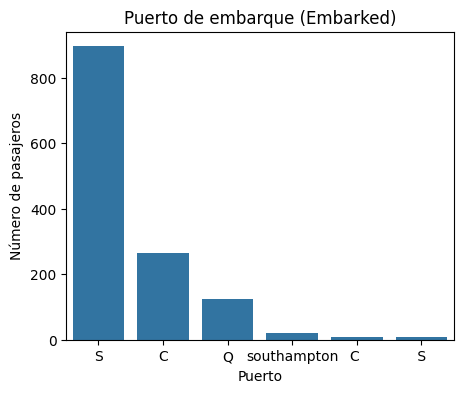

In [106]:
plt.figure(figsize=(5,4))
sns.countplot(x="Embarked", data=df)
plt.title("Puerto de embarque (Embarked)")
plt.xlabel("Puerto")
plt.ylabel("Número de pasajeros")
plt.show()

**Conclusión:**

* La mayoría embarcó en Southampton (S), seguido de Cherbourg (C) y Queenstown (Q).
* Puede tener relación con el tipo de pasajero o clase social.

### 2.7 Variables categóricas — Countplot de `SibSp`

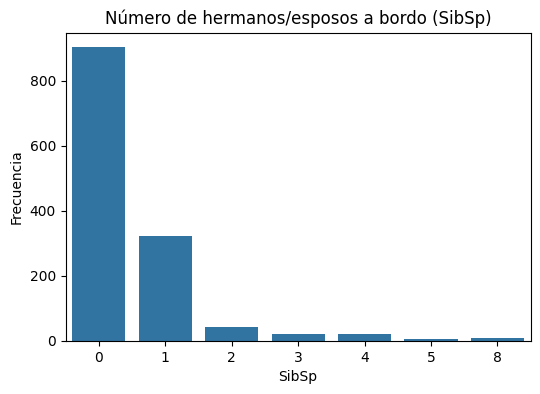

In [107]:
plt.figure(figsize=(6,4))
sns.countplot(x="SibSp", data=df)
plt.title("Número de hermanos/esposos a bordo (SibSp)")
plt.xlabel("SibSp")
plt.ylabel("Frecuencia")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban solos o con un solo familiar (SibSp = 0 o 1).
* Valores más altos son poco frecuentes y podrían analizarse como outliers.

### 2.8 Variables categóricas — Countplot de `Parch`

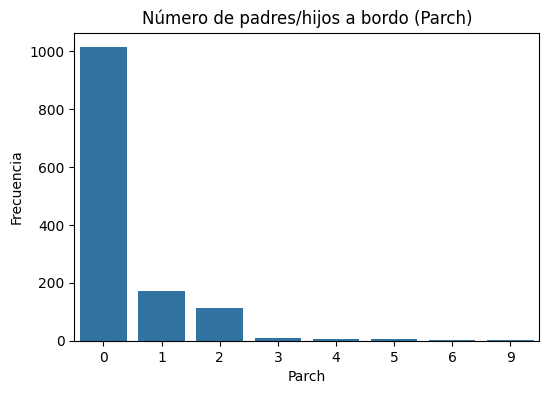

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(x="Parch", data=df)
plt.title("Número de padres/hijos a bordo (Parch)")
plt.xlabel("Parch")
plt.ylabel("Frecuencia")
plt.show()

**Conclusión:**

* La mayoría de pasajeros viajaban sin familiares directos (Parch = 0).
* Algunos viajaban con hijos o padres, pero son menos comunes.

## 3. Análisis bivariante

Ahora estudiamos relaciones entre dos variables, especialmente entre las variables explicativas y la variable objetivo `Survived`.

### 3.1 Categórica ↔ Categórica — `Sex` vs `Survived`

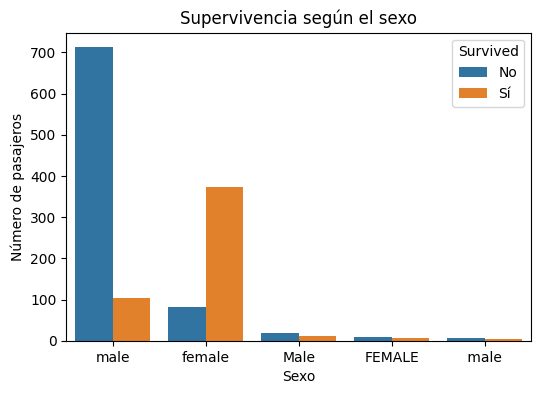

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Supervivencia según el sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pasajeros")
plt.legend(title="Survived", labels=["No", "Sí"])
plt.show()

**Conclusiones:**

- Las mujeres sobreviven en mayor proporción que los hombres.
- `Sex` parece una variable muy relevante para el modelo.

### 3.2 Numérica ↔ Categórica — Grupos de edad vs supervivencia

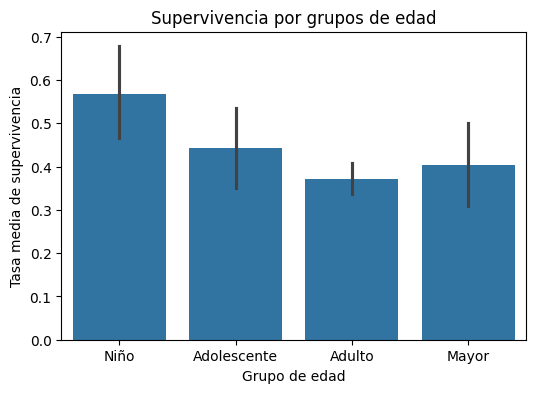

In [110]:
# Crear grupos de edad
df["Age_bin"] = pd.cut(df["Age"], bins=[0, 12, 18, 50, 100],
                       labels=["Niño", "Adolescente", "Adulto", "Mayor"])

plt.figure(figsize=(6,4))
sns.barplot(x="Age_bin", y="Survived", data=df)
plt.title("Supervivencia por grupos de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusiones:**

- Los niños tienen una mayor tasa de supervivencia.
- La probabilidad de supervivencia disminuye en los grupos de mayor edad.
- Demuestra que la edad es una variable relevante.

### 3.3 Categórica ↔ Categórica — Pclass vs supervivencia

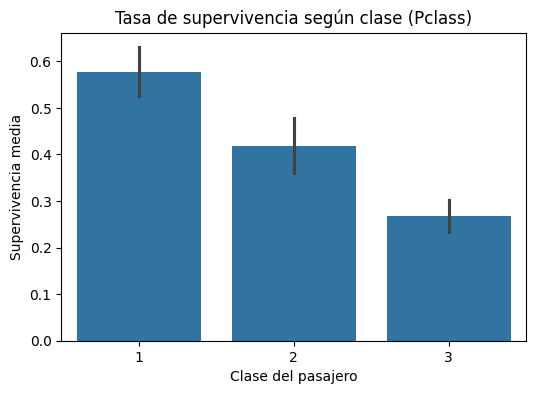

In [111]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Tasa de supervivencia según clase (Pclass)")
plt.xlabel("Clase del pasajero")
plt.ylabel("Supervivencia media")
plt.show()

**Conclusión:**

* Los pasajeros de primera clase tienen una tasa de supervivencia mucho mayor que los de tercera clase.
* La clase social es una variable muy importante para el modelo.

### 3.4 Categórica ↔ Categórica — Embarked vs supervivencia

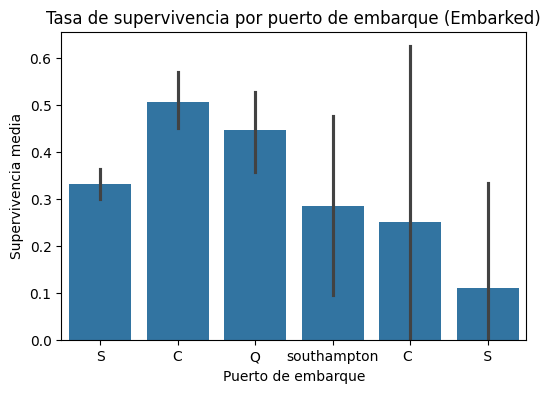

In [112]:
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Tasa de supervivencia por puerto de embarque (Embarked)")
plt.xlabel("Puerto de embarque")
plt.ylabel("Supervivencia media")
plt.show()

**Conclusión:**

* Los pasajeros que embarcaron en Cherbourg (C) presentan mayor tasa de supervivencia, mientras que los que embarcaron en Southampton (S) tienen menor probabilidad.
* Esto podría estar relacionado con la clase del billete o el nivel económico.

### 3.5 Categórica ↔ Categórica — SibSp vs supervivencia

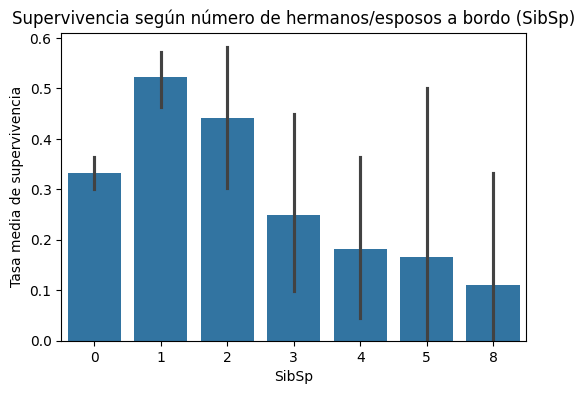

In [113]:
plt.figure(figsize=(6,4))
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Supervivencia según número de hermanos/esposos a bordo (SibSp)")
plt.xlabel("SibSp")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusión:**

* Los pasajeros que viajaban solos (SibSp = 0) o con pocas personas tenían menos probabilidad de sobrevivir que aquellos que viajaban con 1 o 2 familiares.
* A partir de cierto número, la supervivencia vuelve a bajar (viajar en grupos grandes no ayudó).

### 3.6 Categórica ↔ Categórica — Parch vs supervivencia

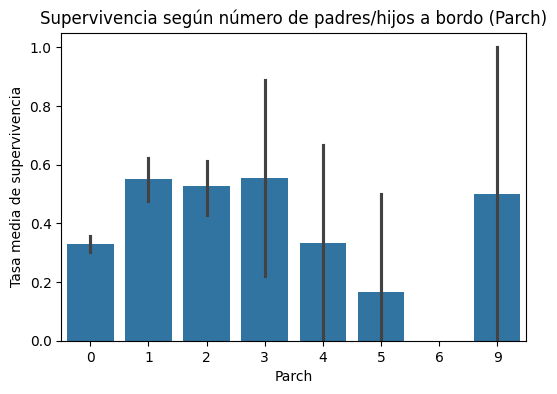

In [114]:
plt.figure(figsize=(6,4))
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Supervivencia según número de padres/hijos a bordo (Parch)")
plt.xlabel("Parch")
plt.ylabel("Tasa media de supervivencia")
plt.show()

**Conclusión:**

* Los pasajeros con 1 o 2 familiares directos (Parch = 1 o 2) tenían más posibilidades de sobrevivir que aquellos sin familia a bordo.
* Valores muy altos de Parch se asocian con menor supervivencia

### 3.7 Numérica ↔ Categórica — Fare vs supervivencia

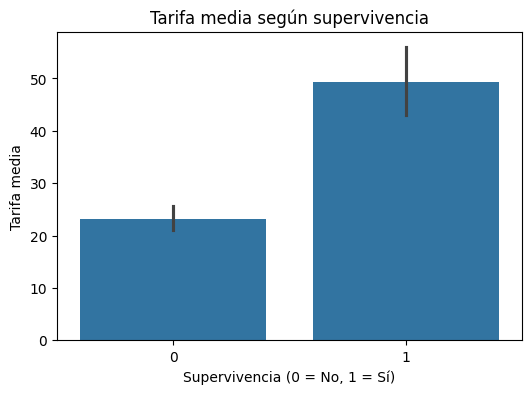

In [115]:
plt.figure(figsize=(6,4))
sns.barplot(x="Survived", y="Fare", data=df)
plt.title("Tarifa media según supervivencia")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Tarifa media")
plt.show()

**Conclusión:**

* La barra correspondiente a Survived = 1 (pasajeros que sobrevivieron) es claramente más alta.
* Esto indica que los pasajeros que pagaron tarifas más altas tenían mayor probabilidad de sobrevivir.
* Confirma la relación entre nivel socioeconómico y supervivencia.

## 4. Análisis multivariante — Matriz de correlación

Analizamos ahora cómo se relacionan entre sí las variables numéricas mediante la **matriz de correlación**.

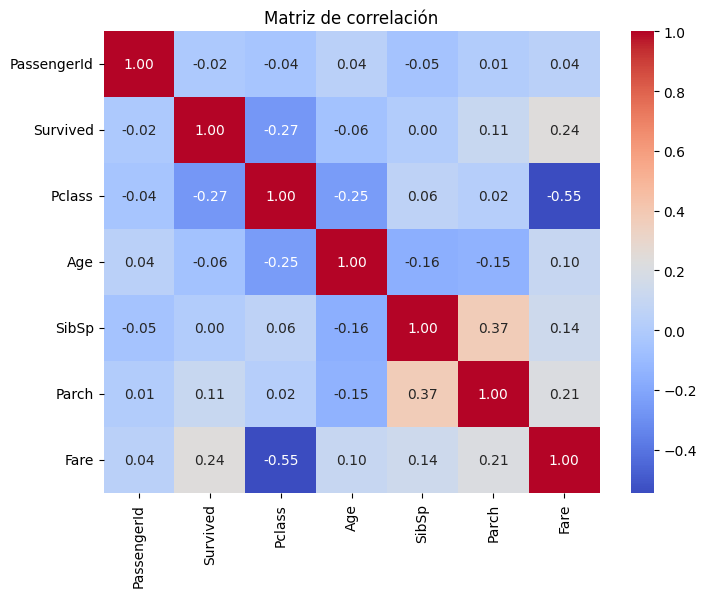

In [116]:
# Matriz de correlación solo con variables numéricas
corr = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

**Conclusiones:**

- `Pclass` y `Fare` muestran correlación (las clases más altas suelen pagar más).
- `SibSp` y `Parch` están relacionadas y podrían combinarse en una medida de tamaño de familia.
- Analizar la correlación con `Survived` nos ayuda a detectar variables potencialmente relevantes.

## 5. Conclusiones finales del EDA

A partir del EDA del Titanic podemos concluir:

- Existen valores nulos importantes en `Age` que deberán tratarse en preprocesamiento.
- Hay outliers en `Fare` y `Age` que deberemos tratar más adelante.
- Variables como `Sex`, `Pclass`, `Fare` y los grupos de edad muestran relación con la supervivencia.
- Algunas variables numéricas están correlacionadas entre sí, lo que sugiere posibles combinaciones o simplificaciones.

✅ Tras este análisis, el siguiente paso es aplicar **preprocesamiento** para:
- Imputar o eliminar valores nulos.
- Tratar outliers de forma adecuada.
- Codificar variables categóricas.
- Escalar variables numéricas cuando el modelo lo requiera.

# Preprocesamiento

## Paso 1: Limpieza estructural básica

Algunas partes del paso 1 es mejor hacerlo antes de comenzar con los análisis univariante, bivariante del EDA.

Lo único que habría que dejar para después del EDA es la corrección de outliers (errores evidentes).

En este tutorial está todo separado para mayor claridad.

### 1.1 Corrección de tipos y normalización de categorías

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1324 non-null   int64   
 1   Survived     1324 non-null   int64   
 2   Pclass       1324 non-null   int64   
 3   Name         1324 non-null   object  
 4   Sex          1324 non-null   object  
 5   Age          1025 non-null   float64 
 6   SibSp        1324 non-null   int64   
 7   Parch        1324 non-null   int64   
 8   Ticket       1324 non-null   object  
 9   Fare         1282 non-null   float64 
 10  Cabin        300 non-null    object  
 11  Embarked     1322 non-null   object  
 12  Age_bin      1015 non-null   category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 125.7+ KB


In [118]:
# Sexo
df["Sex"].unique()

array(['male', 'female', 'Male', 'FEMALE', ' male '], dtype=object)

In [119]:
# Normalizar los valores de la columna 'Sex'
# Pasamos a minúsculas y, de paso, eliminamos posibles espacios
df["Sex"] = df["Sex"].str.lower().str.strip()

In [120]:
# Nos aseguramos que se haya corregido
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [121]:
# Puerto de embarque
df["Embarked"].unique()

array(['S', 'C', 'Q', 'southampton', nan, 'C ', ' S '], dtype=object)

In [122]:
# Ejemplo: sustituir valores incorrectos (si los hubiera)
df["Embarked"].replace({"southampton": "S"}, inplace=True)
df["Embarked"] = df["Embarked"].str.upper().str.strip()

/tmp/ipython-input-4293584874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].replace({"southampton": "S"}, inplace=True)


In [123]:
# Comprobamos que se haya corregido
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 1.2 Eliminar filas duplicadas

In [124]:
# Comprobar si hay filas duplicadas en el dataset
df.duplicated().sum()

np.int64(15)

In [125]:
df = df.drop_duplicates()

In [126]:
# Comprobar si se ha realizado bien
df.duplicated().sum()

np.int64(0)

### 1.3 Corrección de outliers (valores imposibles)

En el EDA vimos que había edades muy por encima de la realidad (e incluso por debajo, valores negativos) y tarifas negativas

In [127]:
# Edades imposibles
df.loc[(df["Age"] < 0) | (df["Age"] > 120), "Age"] = np.nan

In [128]:
# Comprobamos, lo podríamos hacer repitiendo la ejecución del boxplot
print(df["Age"].min())
print(df["Age"].max())

0.17
80.0


In [129]:
# Tarifas imposibles (negativas)
df.loc[(df["Fare"] < 0), "Fare"] = np.nan

In [130]:
# Comprobamos
print(df["Fare"].min())

0.0


## Paso 2: División en Train/Test

### Paso 2.1. Separar las featues y target

In [131]:
# Seleccionamos las columnas relevantes (features) y la variable objetivo (target)
# En EDA ya dejamos claro que Name, Cabin, etc. no eran útiles
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'

X = df[features].copy()
y = df[target]

### Paso 2.2. División del dataset

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # el 20% para test, 80% para train
    random_state=42,     # fija la aleatoriedad para reproducir resultados
    stratify=y           # mantiene la proporción de clases en train y test
)

## Paso 3: Preprocesamiento después del split

### 3.1 Imputación de nulos

En el EDA detectamos nulos en:
* Age (numérica)
* Fare (numérica)
* Cabin (textual, eliminada en el dataset de entrenamiento)
* Embarked (categórica)

In [133]:
# Comprobamos
print(X_train["Age"].isnull().sum())
print(X_test["Age"].isnull().sum())

236
70


In [134]:
# Imputamos age
# Usamos median porque la distribución está ligeramente sesgada
from sklearn.impute import SimpleImputer

imputer_age = SimpleImputer(strategy='median')

# Ajustamos (fit) SOLO con train
X_train["Age"] = imputer_age.fit_transform(X_train[["Age"]])

# Transformamos test con lo aprendido
X_test["Age"] = imputer_age.transform(X_test[["Age"]])

In [135]:
# Comprobamos
print(X_train["Age"].isnull().sum())
print(X_test["Age"].isnull().sum())

0
0


In [136]:
# Imputamos Fare
# Usamos median porque la distribución está muy sesgada
imputer_fare = SimpleImputer(strategy='median')

# Ajustamos (fit) SOLO con train
X_train["Fare"] = imputer_fare.fit_transform(X_train[["Fare"]])

# Transformamos test con lo aprendido
X_test["Fare"] = imputer_fare.transform(X_test[["Fare"]])

In [137]:
# Comprobamos
print(X_train["Fare"].isnull().sum())
print(X_test["Fare"].isnull().sum())

0
0


In [138]:
# Imputamos Embarked
# Imputador para columnas categóricas, quedándose con la categoría más frecuente
imputer_cat = SimpleImputer(strategy="most_frequent")

X_train["Embarked"] = imputer_cat.fit_transform(X_train[["Embarked"]]).ravel()
X_test["Embarked"]  = imputer_cat.transform(X_test[["Embarked"]]).ravel()


In [139]:
# Comprobamos
print(X_train["Embarked"].unique())
print(X_test["Embarked"].unique())

['S' 'Q' 'C']
['C' 'S' 'Q']


In [140]:
print(X_train["Embarked"].isnull().sum())
print(X_test["Embarked"].isnull().sum())

0
0


In [141]:
X_train["Embarked"].value_counts(dropna=False)

,count
Embarked,
S,739
C,211
Q,97


### 3.2 Codificación de variables categóricas (One-Hot)

Teníamos las variables categóricas:
* Embarked (nominal, sin orden)
* Sex (nominal, sin orden)

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 1021 to 108
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       1047 non-null   float64
 3   Fare      1047 non-null   float64
 4   SibSp     1047 non-null   int64  
 5   Parch     1047 non-null   int64  
 6   Embarked  1047 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 65.4+ KB


In [143]:
from sklearn.preprocessing import OneHotEncoder

# Empezamos por Embarked
encoder_embarked = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustamos SOLO con los datos de train
encoder_embarked.fit(X_train[["Embarked"]])

# Transformamos train y test usando lo aprendido
# embarked_train y embarked_test son arrays numpy, hay que procesarlos más tarde para obtener un DataFrame
embarked_train = encoder_embarked.transform(X_train[["Embarked"]])
embarked_test  = encoder_embarked.transform(X_test[["Embarked"]])

# Convertimos las matrices a DataFrames para verlas mejor y añadirlas posteriormente a nuestro DataFrame completo
embarked_train = pd.DataFrame(embarked_train,
                              columns=encoder_embarked.get_feature_names_out(["Embarked"]),
                              index=X_train.index)
embarked_test  = pd.DataFrame(embarked_test,
                              columns=encoder_embarked.get_feature_names_out(["Embarked"]),
                              index=X_test.index)

In [144]:
# Eliminamos columnas categóricas originales, sustituyéndolas por las nuevas generadas
X_train = pd.concat([X_train.drop(columns=["Embarked"]), embarked_train], axis=1)
X_test  = pd.concat([X_test.drop(columns=["Embarked"]), embarked_test], axis=1)

In [145]:
# Comprobamos cómo ha quedado el dataset
X_train.head(10)

,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
1021,3,male,32.0,8.0500,0,0,0.0,0.0,1.0
318,1,female,31.0,164.8667,0,2,0.0,0.0,1.0
924,3,male,28.0,23.4500,1,2,0.0,0.0,1.0
652,3,male,21.0,8.4333,0,0,0.0,0.0,1.0
1189,1,male,30.0,45.5000,0,0,0.0,0.0,1.0
1249,3,male,28.0,7.7500,0,0,0.0,1.0,0.0
897,3,female,30.0,7.6292,0,0,0.0,1.0,0.0
1266,1,female,45.0,262.3750,0,0,1.0,0.0,0.0
1109,1,female,50.0,211.5000,1,1,1.0,0.0,0.0
855,3,female,18.0,9.3500,0,1,0.0,0.0,1.0


In [146]:
# Modificamos ahora Sex
encoder_sex = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustamos SOLO con los datos de train
encoder_sex.fit(X_train[["Sex"]])

# Transformamos train y test usando lo aprendido
# embarked_train y embarked_test son arrays numpy, hay que procesarlos más tarde para obtener un DataFrame
sex_train = encoder_sex.transform(X_train[["Sex"]])
sex_test  = encoder_sex.transform(X_test[["Sex"]])

# Convertimos las matrices a DataFrames para verlas mejor y añadirlas posteriormente a nuestro DataFrame completo
sex_train = pd.DataFrame(sex_train,
                              columns=encoder_sex.get_feature_names_out(["Sex"]),
                              index=X_train.index)
sex_test  = pd.DataFrame(sex_test,
                              columns=encoder_sex.get_feature_names_out(["Sex"]),
                              index=X_test.index)

In [147]:
# Eliminamos columnas categóricas originales, sustituyéndolas por las nuevas generadas
X_train = pd.concat([X_train.drop(columns=["Sex"]), sex_train], axis=1)
X_test  = pd.concat([X_test.drop(columns=["Sex"]), sex_test], axis=1)

In [148]:
# Comprobamos cómo ha quedado el dataset
X_train.head(10)

,Pclass,Age,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
1021,3,32.0,8.0500,0,0,0.0,0.0,1.0,0.0,1.0
318,1,31.0,164.8667,0,2,0.0,0.0,1.0,1.0,0.0
924,3,28.0,23.4500,1,2,0.0,0.0,1.0,0.0,1.0
652,3,21.0,8.4333,0,0,0.0,0.0,1.0,0.0,1.0
1189,1,30.0,45.5000,0,0,0.0,0.0,1.0,0.0,1.0
1249,3,28.0,7.7500,0,0,0.0,1.0,0.0,0.0,1.0
897,3,30.0,7.6292,0,0,0.0,1.0,0.0,1.0,0.0
1266,1,45.0,262.3750,0,0,1.0,0.0,0.0,1.0,0.0
1109,1,50.0,211.5000,1,1,1.0,0.0,0.0,1.0,0.0
855,3,18.0,9.3500,0,1,0.0,0.0,1.0,1.0,0.0


### 3.3 Feature Engineering: FamilySize

In [149]:
# Crear tamaño familiar
X_train["FamilySize"] = X_train["SibSp"] + X_train["Parch"] + 1
X_test["FamilySize"] = X_test["SibSp"] + X_test["Parch"] + 1

In [150]:
# Eliminamos columnas redundantes
X_train = X_train.drop(columns=["SibSp", "Parch"])
X_test = X_test.drop(columns=["SibSp", "Parch"])

In [151]:
# Comprobamos cómo ha quedado
X_train.head(10)

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize
1021,3,32.0,8.0500,0.0,0.0,1.0,0.0,1.0,1
318,1,31.0,164.8667,0.0,0.0,1.0,1.0,0.0,3
924,3,28.0,23.4500,0.0,0.0,1.0,0.0,1.0,4
652,3,21.0,8.4333,0.0,0.0,1.0,0.0,1.0,1
1189,1,30.0,45.5000,0.0,0.0,1.0,0.0,1.0,1
1249,3,28.0,7.7500,0.0,1.0,0.0,0.0,1.0,1
897,3,30.0,7.6292,0.0,1.0,0.0,1.0,0.0,1
1266,1,45.0,262.3750,1.0,0.0,0.0,1.0,0.0,1
1109,1,50.0,211.5000,1.0,0.0,0.0,1.0,0.0,3
855,3,18.0,9.3500,0.0,0.0,1.0,1.0,0.0,2


### 3.4 Escalado

In [152]:
from sklearn.preprocessing import StandardScaler

# ¡IMPORTANTE! Seleccionamos solo las columnas numéricas que queremos escalar (por ahora seleccionaremos todas)
num_cols = ["Pclass", "Age", "Fare", "FamilySize"]

# Creamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador SOLO con los datos de train (fit)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Aplicamos la transformación a test (transform)
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [153]:
# Comprobamos cómo ha quedado el dataset
X_train.head(10)

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize
1021,0.839462,0.201613,-0.465260,0.0,0.0,1.0,0.0,1.0,-0.548532
318,-1.561949,0.121620,2.481205,0.0,0.0,1.0,1.0,0.0,0.737724
924,0.839462,-0.118360,-0.175906,0.0,0.0,1.0,0.0,1.0,1.380852
652,0.839462,-0.678314,-0.458058,0.0,0.0,1.0,0.0,1.0,-0.548532
1189,-1.561949,0.041626,0.238397,0.0,0.0,1.0,0.0,1.0,-0.548532
1249,0.839462,-0.118360,-0.470897,0.0,1.0,0.0,0.0,1.0,-0.548532
897,0.839462,0.041626,-0.473166,0.0,1.0,0.0,1.0,0.0,-0.548532
1266,-1.561949,1.241526,4.313311,1.0,0.0,0.0,1.0,0.0,-0.548532
1109,-1.561949,1.641493,3.357409,1.0,0.0,0.0,1.0,0.0,0.737724
855,0.839462,-0.918294,-0.440834,0.0,0.0,1.0,1.0,0.0,0.094596


## Paso 4: Dataset listo para modelar

### Paso 4.1. Revisar coherencia

In [154]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass        0
Age           0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
FamilySize    0
dtype: int64
Pclass        0
Age           0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
FamilySize    0
dtype: int64


In [155]:
X_train.dtypes

,0
Pclass,float64
Age,float64
Fare,float64
Embarked_C,float64
Embarked_Q,float64
Embarked_S,float64
Sex_female,float64
Sex_male,float64
FamilySize,float64


In [156]:
print(X_train.shape)
print(X_test.shape)

print(X_train.columns)
print(X_test.columns)

(1047, 9)
(262, 9)
Index(['Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'FamilySize'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'FamilySize'],
      dtype='object')


### Paso 4.3. Guardar los datasets transformados

In [157]:
X_train.to_csv("titanic_X_train_preprocessed.csv", index=False)
X_test.to_csv("titanic_X_test_preprocessed.csv", index=False)
y_train.to_csv("titanic_y_train.csv", index=False)
y_test.to_csv("titanic_y_test.csv", index=False)

# Entrenamiento con LR

Entrenamiento con LR.

In [158]:
# Librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [159]:
# Diccionario de hiperparámetros
param_grid = {
    "C": [0.01, 0.1, 1, 10],   # mayor C -> menos regularización
    "max_iter": [300]          # suficiente para asegurar convergencia
}

In [160]:
# Modelo base
log_reg = LogisticRegression()

# Configurar GridSearchCV
grid = GridSearchCV(
    estimator=log_reg,     # modelo base
    param_grid=param_grid, # diccionario de hiperparámetros
    scoring="accuracy",    # Métrica que usará GridSearch para decidir qué combinación es mejor
    cv=5,                  # validación cruzada 5-fold
    n_jobs=-1              # usa todos los núcleos disponibles (opcional)
)

# Entrenamiento del GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [300]},
             scoring='accuracy')

In [161]:
print("Mejores hiperparámetros encontrados:", grid.best_params_)

Mejores hiperparámetros encontrados: {'C': 10, 'max_iter': 300}


In [162]:
# Modelo final ya entrenado con los mejores hiperparámetros
best_model = grid.best_estimator_

## Análisis de overfitting / underfitting

In [163]:
# Accuracy en entrenamiento
train_acc = best_model.score(X_train, y_train)

# Accuracy en test
test_acc = best_model.score(X_test, y_test)

print("Accuracy TRAIN:", train_acc)
print("Accuracy TEST :", test_acc)

Accuracy TRAIN: 0.8433619866284623
Accuracy TEST : 0.8435114503816794


**Conclusiones**

* **El accuracy en entrenamiento (0.8433)** y **el accuracy en test (0.8435)** son prácticamente **idénticos**.
* Esto indica que **el modelo generaliza muy bien**:

  * **No hay sobreajuste** → el modelo no memoriza los datos.
  * **No hay subajuste** → el modelo sí aprende patrones útiles.

## Análisis atributos útiles

In [164]:
# Coeficientes del modelo
print("\nCoeficientes del modelo (coef_):")
for feature, coef in zip(X_train.columns, best_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Coeficientes del modelo (coef_):
Pclass: -0.6990
Age: -0.3969
Fare: 0.2339
Embarked_C: -0.1959
Embarked_Q: 0.3717
Embarked_S: -0.2180
Sex_female: 1.6739
Sex_male: -1.7162
FamilySize: -0.2339


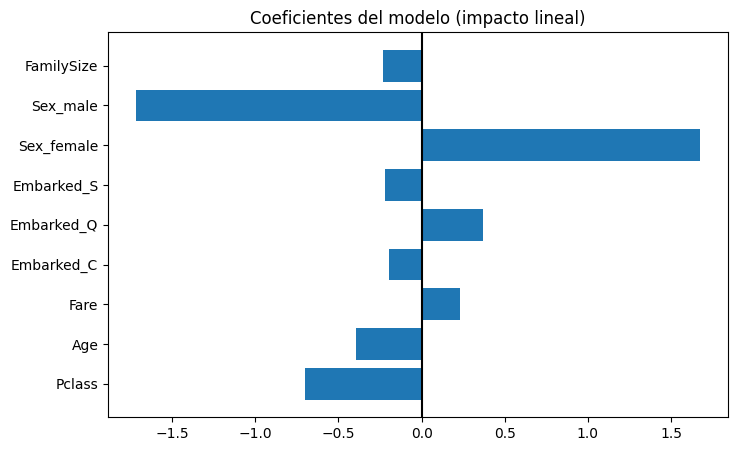

In [165]:
coef = best_model.coef_[0]
features = X_train.columns

plt.figure(figsize=(8,5))
plt.barh(features, coef)
plt.axvline(0, color='black')
plt.title("Coeficientes del modelo (impacto lineal)")
plt.show()

**Conclusiones**

El gráfico muestra el impacto **lineal** de cada variable en la probabilidad de **sobrevivir** (clase 1).
Interpretación:

**1. El sexo es la variable más influyente**

* **`Sex_female` tiene un coeficiente muy positivo** → ser mujer **aumenta mucho** la probabilidad de sobrevivir.
* **`Sex_male` es muy negativo** → ser hombre **reduce fuertemente** la probabilidad de sobrevivir.

👉 Coincide con lo que sabemos del Titanic:
**“women and children first”.**

**2. La clase (`Pclass`) también tiene un impacto importante**

* Su coeficiente es **negativo** → a medida que la clase empeora (1 → 2 → 3), la probabilidad de sobrevivir **disminuye**.

👉 Pasajeros de **1ª clase** tuvieron más supervivencia.

**3. La edad (`Age`) reduce la probabilidad de sobrevivir**

* Coeficiente ligeramente **negativo**.

👉 Personas mayores tenían menos probabilidades de sobrevivir.

**4. La tarifa (`Fare`) aumenta un poco la probabilidad**

* Coeficiente **positivo**, aunque pequeño.

👉 Tarifa más alta suele asociarse a mejores condiciones (más probabilidad de supervivencia),
pero en este modelo su efecto es **moderado** comparado con sexo o clase.

**5. Variables de embarque (`Embarked_*`) tienen impacto leve**

* `Embarked_Q`, `Embarked_C`, `Embarked_S` muestran coeficientes pequeños.
* Indican diferencias menores según el puerto de embarque, pero **no son determinantes**.

**6. Tamaño de familia (`FamilySize`) tiene efecto muy pequeño**

* Coeficiente cercano a 0 → **influencia muy baja** en la predicción.


## Evaluación

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [167]:
# Predicciones finales
y_pred = best_model.predict(X_test)

In [168]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy final en test:", acc)


Accuracy final en test: 0.8435114503816794


**Conclusiones**:

El modelo obtiene un **accuracy del 84.35% en el conjunto de test**, un resultado muy sólido para el dataset Titanic.

Esto indica que la Regresión Logística ha sido capaz de aprender patrones relevantes sin sobreajustar, y que generaliza bien a datos nuevos. Un rendimiento por encima del 80% es considerado muy bueno en este problema, donde el comportamiento real es complejo y ruidoso.

In [169]:
# Comprobamos el orden de las clases (muy importante para repsentar
# bien el cm en el heatmap)
print("Orden de las clases:", best_model.classes_)

Orden de las clases: [0 1]


In [170]:
# Matriz de confusión
# Pasarle labels sirve para indicar explícitamente en qué orden deben
# aparecer las clases dentro de la matriz.
# Así podremos poner valores a mano (más representativos) en el heatmap
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

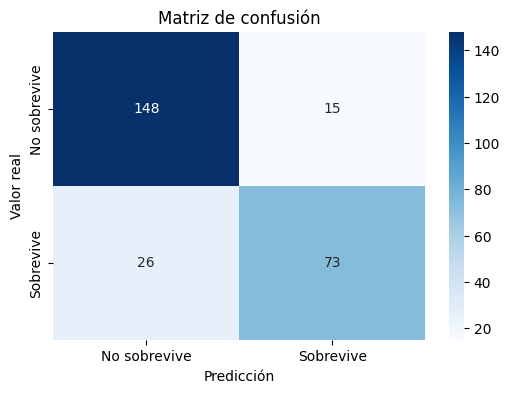

In [171]:
# Mismo oren que devuelve classes_ (primero 0, luego 1)
labels = ["No sobrevive", "Sobrevive"]

# Representación en heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show()

**Conclusiones**:

La matriz muestra que el modelo acierta a la gran mayoría de pasajeros que no sobrevivieron (148 aciertos y solo 15 errores), lo que indica que identifica bien la clase mayoritaria.

En la clase de “Sobrevive”, el rendimiento es algo más bajo: 73 aciertos frente a 26 errores. Aun así, la capacidad global de distinguir entre sobrevivientes y no sobrevivientes es buena.

El modelo tiende a ser más conservador, fallando más en predecir supervivencias que fallecimientos, pero en conjunto ofrece un rendimiento equilibrado y coherente con el accuracy obtenido.
